In [1]:
import requests, StringIO, pandas as pd, json, re

In [2]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [3]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_5349a5a5_09de_4aaa_b5b3_e82073ba41fb',
  'project_id':'08e2c84c09f1418ba5be757cb0e0c200',
  'region':'dallas',
  'user_id':'a58a50ce3deb4cf2b7c66e3a03f06975',
  'domain_id':'9c9f48a298df4d6599e4652d55e13548',
  'domain_name':'1141087',
  'username':'admin_2761e115b0cdf2ecfda96fc4be91cb226e1937fa',
  'password':"""Ag6Kcv}01gnrp.}r""",
  'filename':'califormia_baby_names.csv',
  'container':'notebooks',
  'tenantId':'s792-f4b33b7e018158-8c401677e909'
}

In [4]:
content_string = get_file_content(credentials_2)
california_baby_names_df = pd.read_csv(content_string)

In [5]:
california_baby_names_df.head()

,Rank,Male name,Number of,Female name,Number of.1
0,NaN,NaN,males,NaN,females
1,1,Noah,"2,751",Sophia,"2,942"
2,2,Jacob,"2,540",Mia,"2,850"
3,3,Ethan,"2,467",Emma,"2,706"
4,4,Daniel,"2,460",Olivia,"2,507"


In [6]:
california_baby_names_df.tail()

,Rank,Male name,Number of,Female name,Number of.1
97,97,Emiliano,560,Liliana,407
98,98,Alejandro,552,Lillian,405
99,99,Ryder,532,Angelina,402
100,100,Abraham,530,Sophie,398
101,NaN,NaN,NaN,NaN,NaN


In [7]:
california_baby_names_df['Male name'].values

array([nan, 'Noah', 'Jacob', 'Ethan', 'Daniel', 'Matthew', 'Alexander',
       'Jayden', 'Sebastian', 'Liam', 'David', 'Julian', 'Aiden',
       'Michael', 'Nathan', 'Benjamin', 'Anthony', 'Isaac', 'Mason',
       'Dylan', 'Andrew', 'James', 'Angel', 'Joseph', 'Adrian', 'Aaron',
       'Elijah', 'Logan', 'William', 'Mateo', 'Lucas', 'Oliver', 'Joshua',
       'Jonathan', 'Christopher', 'Isaiah', 'Gabriel', 'Ryan', 'Samuel',
       'Jose', 'Luke', 'Christian', 'Damian', 'Jackson', 'Kevin',
       'Dominic', 'Leonardo', 'Brandon', 'Caleb', 'Adam', 'Diego', 'Henry',
       'Nicholas', 'Evan', 'Ian', 'Jack', 'Jesus', 'Jason', 'Luis', 'Levi',
       'Santiago', 'Josiah', 'Wyatt', 'Owen', 'Ivan', 'Juan', 'Carlos',
       'Hunter', 'Jordan', 'John', 'Robert', 'Eli', 'Elias', 'Austin',
       'Jeremiah', 'Roman', 'Leo', 'Carter', 'Nathaniel', 'Xavier',
       'Vincent', 'Giovanni', 'Ezra', 'Thomas', 'Hudson', 'Miguel',
       'Jaxon', 'Ayden', 'Landon', 'Connor', 'Charles', 'Alan', 'Matteo',
 

In [8]:
california_baby_names_df['Female name'].values

array([nan, 'Sophia', 'Mia', 'Emma', 'Olivia', 'Isabella', 'Emily',
       'Sofia', 'Abigail', 'Victoria', 'Ava', 'Alexa', 'Camila',
       'Charlotte', 'Samantha', 'Evelyn', 'Scarlett', 'Madison',
       'Elizabeth', 'Penelope', 'Zoe', 'Chloe', 'Natalie', 'Avery',
       'Allison', 'Grace', 'Aria', 'Amelia', 'Genesis', 'Audrey', 'Mila',
       'Ariana', 'Melanie', 'Ella', 'Zoey', 'Lily', 'Aubrey', 'Delilah',
       'Leah', 'Maya', 'Ximena', 'Aaliyah', 'Layla', 'Harper', 'Hannah',
       'Violet', 'Brooklyn', 'Valentina', 'Bella', 'Natalia', 'Ashley',
       'Riley', 'Arianna', 'Andrea', 'Luna', 'Hailey', 'Alyssa', 'Stella',
       'Kimberly', 'Savannah', 'Kaylee', 'Ellie', 'Jasmine', 'Kayla',
       'Hazel', 'Brianna', 'Valerie', 'Eva', 'Ruby', 'Sarah', 'Claire',
       'Valeria', 'Naomi', 'Aurora', 'Nicole', 'Katherine', 'Alice', 'Amy',
       'Ariel', 'Eliana', 'Gianna', 'Alina', 'Jocelyn', 'Alexandra',
       'Anna', 'Melody', 'Madelyn', 'Leilani', 'Addison', 'Elena',
       'Gisel

In [9]:
california_baby_names_df = california_baby_names_df.set_index(california_baby_names_df["Rank"])
california_baby_names_df.drop(['Rank'], axis=1, inplace=True)
california_baby_names_df.head()

,Male name,Number of,Female name,Number of.1
Rank,,,,
NaN,NaN,males,NaN,females
1,Noah,"2,751",Sophia,"2,942"
2,Jacob,"2,540",Mia,"2,850"
3,Ethan,"2,467",Emma,"2,706"
4,Daniel,"2,460",Olivia,"2,507"


In [10]:
%matplotlib inline 

In [11]:
credentials_3 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_5349a5a5_09de_4aaa_b5b3_e82073ba41fb',
  'project_id':'08e2c84c09f1418ba5be757cb0e0c200',
  'region':'dallas',
  'user_id':'a58a50ce3deb4cf2b7c66e3a03f06975',
  'domain_id':'9c9f48a298df4d6599e4652d55e13548',
  'domain_name':'1141087',
  'username':'admin_2761e115b0cdf2ecfda96fc4be91cb226e1937fa',
  'password':"""Ag6Kcv}01gnrp.}r""",
  'filename':'california_male_names.csv',
  'container':'notebooks',
  'tenantId':'s792-f4b33b7e018158-8c401677e909'
}

In [12]:
content_string = get_file_content(credentials_3)
california_male_names_df = pd.read_csv(content_string)

/usr/local/src/bluemix_jupyter_bundle.v20/notebook/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
california_male_names_df.head()

,Name,2015,2014,2013
0,Noah,2751,2767,2550
1,Jacob,2540,2705,2881
2,Ethan,2467,2564,2663
3,Daniel,2460,2553,2594
4,Matthew,2414,2490,2556


In [14]:
california_male_names_df = california_male_names_df.set_index(california_male_names_df["Name"])
california_male_names_df.drop(['Name'], axis=1, inplace=True)
california_male_names_df.head()

,2015,2014,2013
Name,,,
Noah,2751,2767,2550
Jacob,2540,2705,2881
Ethan,2467,2564,2663
Daniel,2460,2553,2594
Matthew,2414,2490,2556


In [15]:
%matplotlib inline

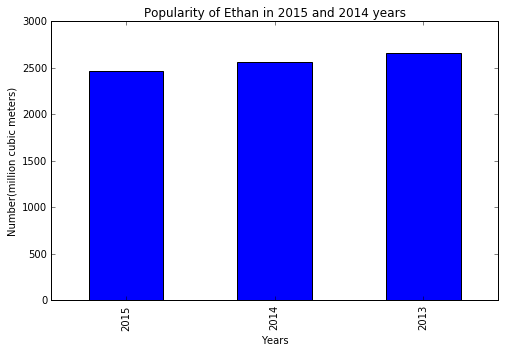

In [16]:
ethan = california_male_names_df.ix['Ethan']
ax = ethan.plot(kind='bar', figsize=(8,5), title="Popularity of %s in 2015 and 2014 years" % ethan.name)
ax.set_ylabel("Number(million cubic meters)")
ax.set_xlabel("Years");

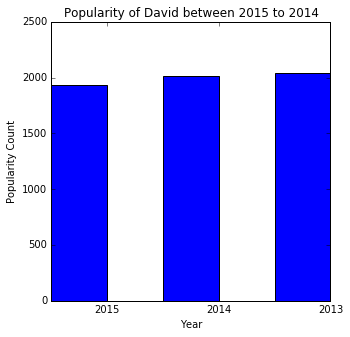

In [17]:
import matplotlib.pyplot as plt, numpy as np

david = california_male_names_df.ix['David']
years = david.index
index = np.arange(len(years))  
plt.figure(figsize=(5,5))
bar_width = 0.5
plt.bar(index, david, bar_width, color='b')
plt.xlabel("Year")
plt.ylabel("Popularity Count")
plt.title("Popularity of %s between 2015 to 2014" % david.name)
plt.xticks(index + bar_width, years)
plt.show()

In [18]:
california_male_names_df["SUM"] = california_male_names_df.sum(axis=1)

In [19]:
california_male_names_sorted_df = california_male_names_df.sort_values(by="SUM",ascending=False)
top5_sums = pd.Series(california_male_names_sorted_df["SUM"].head(5))
top5_sums

Name
Jacob      8126
Noah       8068
Ethan      7694
Daniel     7607
Matthew    7460
Name: SUM, dtype: float64

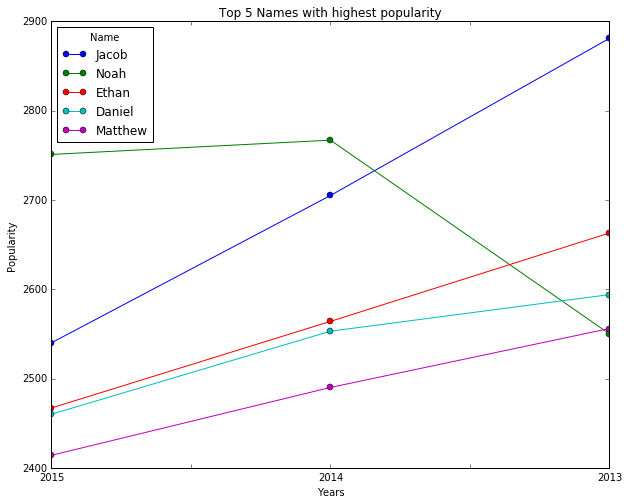

In [20]:
top5_bars = california_male_names_sorted_df[years][0:5].transpose()
ax = top5_bars.plot(figsize=(10,8), marker='o', linestyle='-', title="Top 5 Names with highest popularity")
ax.set_xlabel("Years")
ax.set_ylabel("Popularity");

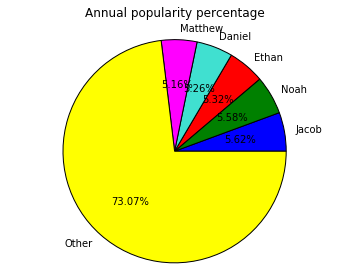

In [21]:
california_male_names_sums = top5_sums
other_sums = california_male_names_sorted_df["SUM"][5:].sum()
california_male_names_sums["Other"] = other_sums

plt.axis('equal')
plt.title("Annual popularity percentage",y=1.08)
plt.pie(
    california_male_names_sums,
    labels=california_male_names_sums.index,
    colors=['blue', 'green', 'red', 'turquoise', 'magenta','yellow'],
    autopct="%1.2f%%",
    radius=1.25);